In [3]:
from fastai.vision import *

In [47]:
folder_list =['boston',
 'dubai',
 'kuala_lampur',
 'london',
 'manhattan',
 'miami',
 'sanfrancisco',
 'seattle',
 'singapore',
 'sydney',
 'taipei',
 'tokyo',
 'toronto']

In [48]:
file_list = [x+'.txt' for x in folder_list]

In [49]:
file_list =['boston.txt',
 'dubai.txt',
 'kuala_lampur.txt',
 'london.txt',
 'manhattan.txt',
 'miami.txt',
 'sanfrancisco.txt',
 'seattle.txt',
 'singapore.txt',
 'sydney.txt',
 'taipei.txt',
 'tokyo.txt',
 'toronto.txt']

PosixPath('/home/ubuntu')

In [ ]:
urls_dir= Path('data/urls/')

In [127]:
path = Path('data/skylines')

In [91]:
urls_dir.ls()

[PosixPath('data/urls/london.txt'),
 PosixPath('data/urls/tokyo.txt'),
 PosixPath('data/urls/singapore.txt'),
 PosixPath('data/urls/toronto.txt'),
 PosixPath('data/urls/seattle.txt'),
 PosixPath('data/urls/taipei.txt'),
 PosixPath('data/urls/miami.txt'),
 PosixPath('data/urls/dubai.txt'),
 PosixPath('data/urls/manhattan.txt'),
 PosixPath('data/urls/boston.txt'),
 PosixPath('data/urls/sanfrancisco.txt'),
 PosixPath('data/urls/sydney.txt'),
 PosixPath('data/urls/kuala_lampur.txt')]

In [92]:
sorted(urls_dir.iterdir())

[PosixPath('data/urls/boston.txt'),
 PosixPath('data/urls/dubai.txt'),
 PosixPath('data/urls/kuala_lampur.txt'),
 PosixPath('data/urls/london.txt'),
 PosixPath('data/urls/manhattan.txt'),
 PosixPath('data/urls/miami.txt'),
 PosixPath('data/urls/sanfrancisco.txt'),
 PosixPath('data/urls/seattle.txt'),
 PosixPath('data/urls/singapore.txt'),
 PosixPath('data/urls/sydney.txt'),
 PosixPath('data/urls/taipei.txt'),
 PosixPath('data/urls/tokyo.txt'),
 PosixPath('data/urls/toronto.txt')]

In [93]:
type(sorted(urls_dir.iterdir()))

list

In [94]:
def mkdirectories(folder_list,path):
    for x in range(len(folder_list)):
        folder = folder_list[x]
        
        dest = path/folder
        dest.mkdir(parents=True, exist_ok=True)
        

In [123]:
def downloader(urls_dir,folder_list,path):
    for index,urls_path in enumerate(sorted(urls_dir.iterdir())):
      
        folder = folder_list[index]
        dest = path/folder
        download_images(urls_path, dest, max_pics=200,max_workers=0, timeout=10)

In [124]:
# def downloader(folder_list, file_list):    
#     for x in range(len(folder_list)):
#         folder = folder_list[x]
#         file = file_list[x]
#         path = Path('data/skylines')
#         dest = path/folder
#         download_images(dest/file, dest, max_pics=200)

In [125]:
mkdirectories(folder_list,path)

In [126]:
downloader(urls_dir,folder_list,path)

In [128]:
for x in folder_list:
    verify_images(path/x, delete=True, max_workers=8)

In [132]:
classes = folder_list.copy()

In [133]:
np.random.seed(123)

In [4]:
path = 'data/skylines'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

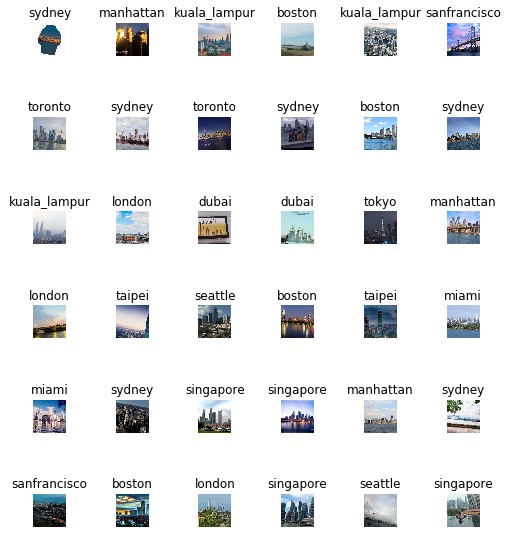

In [5]:
data.show_batch(rows=6, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['boston',
  'dubai',
  'kuala_lampur',
  'london',
  'manhattan',
  'miami',
  'sanfrancisco',
  'seattle',
  'singapore',
  'sydney',
  'taipei',
  'tokyo',
  'toronto'],
 13,
 928,
 232)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.002413,2.290308,0.750000,01:01
1,2.492231,1.927022,0.629310,00:54
2,2.166998,1.883751,0.616379,01:00
3,1.955250,1.858609,0.603448,01:00


In [9]:
learn.save('stage-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses)== len(idxs)

True

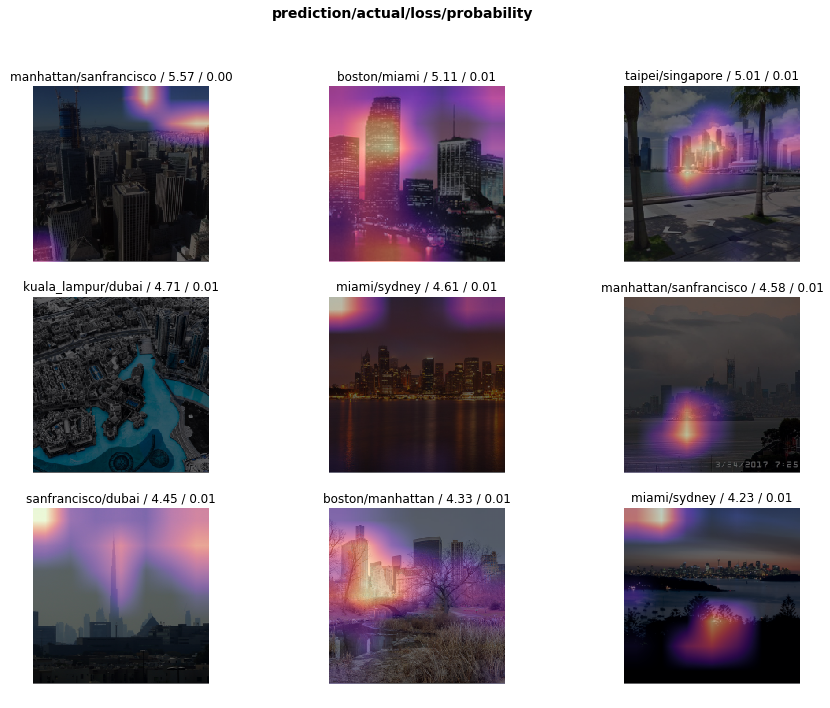

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

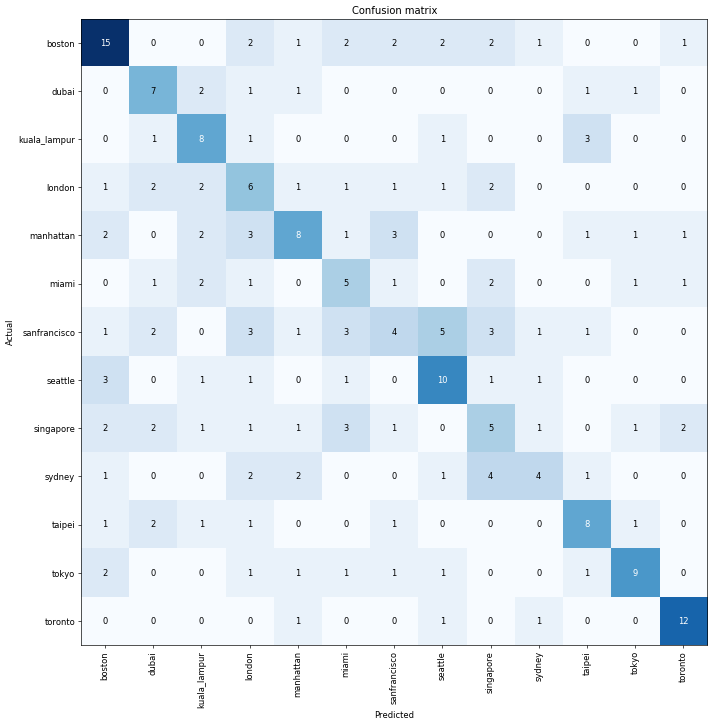

In [147]:
interp.plot_confusion_matrix(figsize=(12,12), dpi =60)

In [12]:
interp.most_confused(min_val=3)

[('miami', 'singapore', 7),
 ('boston', 'sydney', 4),
 ('dubai', 'kuala_lampur', 4),
 ('kuala_lampur', 'taipei', 4),
 ('manhattan', 'boston', 4),
 ('sanfrancisco', 'manhattan', 4),
 ('dubai', 'london', 3),
 ('kuala_lampur', 'toronto', 3),
 ('miami', 'boston', 3),
 ('miami', 'sanfrancisco', 3),
 ('miami', 'sydney', 3),
 ('singapore', 'boston', 3),
 ('singapore', 'dubai', 3),
 ('sydney', 'miami', 3),
 ('toronto', 'seattle', 3)]

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.607076,1.942710,0.564655,01:00


In [15]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (928 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dubai,dubai,dubai,dubai,dubai
Path: data/skylines;

Valid: LabelList (232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sydney,sanfrancisco,manhattan,manhattan,tokyo
Path: data/skylines;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


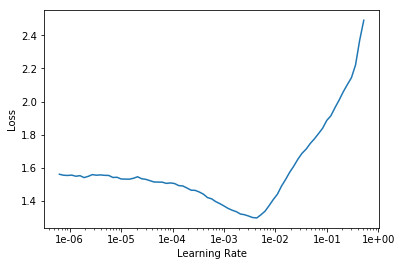

In [20]:
learn.recorder.plot()

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.804896,4.248686,0.650862,00:55
1,1.641586,1.965635,0.551724,00:58
